## Gaussian Distribution:


we define the gaussian distrbution defined over-$D$ dimentional vector $X$ of continuos variable with the $mean$ $\mu$ and the variance $\Sigma$ by:

$~~~~~~~~~~~~~~~~~~~~~~~$ $\mathbb{N}(X/\mu, \Sigma)=\dfrac{1}{(2\pi)^{\mathbb{D}/2}}\dfrac{1}{|\Sigma|^{1/2}}\exp\{-\dfrac{1}{2}(X-\mu)^{T}\Sigma^{-1}(X-\mu)\}$

In [5]:
import numpy as np 
from numpy.linalg import inv, det
import matplotlib.pyplot as plt


def Gussian_Distribution(X, mu, sigma): 
    D=X.shape[0]
    const=1/(np.pi**(D/2)*det(sigma)**0.5)
    return const*np.exp(-0.5*(X-mu).T@inv(sigma)@(X-mu))

X=np.array([0.5, 1])
mu=np.array([1,5])
sigma=np.array([[1,5], [-1, 2]])
gd= Gussian_Distribution(X=X, mu=mu, sigma=sigma)
gd


0.0655574895974421

now we want to perform some visualzation we begin with $D$=1:

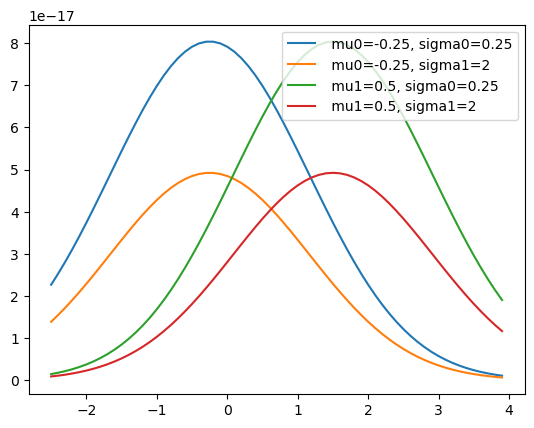

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab

def Gussian_Distribution1D(X, mu, sigma): 
    D=X.shape[0]
    const=1/(np.pi**(D/2)*sigma**0.5)
    return const*np.exp(-0.5*(X-mu)**2/2)
X=np.arange(-2.5, 4, 0.1)
mus=np.array([-0.25,1.5])
sigmas=np.array([0.75, 2.])
assert [sigmas[i]>0  for i in range(sigmas.shape[0])]# all variances must be strictely positive
mu0, mu1=mus[0], mus[1]
sigma0,sigma1=sigmas[0], sigmas[1]
z00=Gussian_Distribution1D(X, mu0, sigma0)
z01=Gussian_Distribution1D(X, mu0, sigma1)
z10=Gussian_Distribution1D(X, mu1, sigma0)
z11=Gussian_Distribution1D(X, mu1, sigma1)       

plt.plot(X, z00, label=' mu0=-0.25, sigma0=0.25')
plt.plot(X, z01, label=' mu0=-0.25, sigma1=2')
plt.plot(X, z10, label=' mu1=0.5, sigma0=0.25')
plt.plot(X, z11, label=' mu1=0.5, sigma1=2')
plt.legend()

          




in 2-dimentional things is more challenging a little bit, such as :
$X=[X_{0}, X_{1}]$ ,$\mu=[\mu_{0}, \mu_{1}]$ and $\Sigma=[[\Sigma_{00}, \Sigma_{01}],[\Sigma_{10}, \Sigma_{11}]]$

in this case the distribution called the $bivariate \_ normal$ distribution

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.mlab import bivariate_normal

x0 = np.linspace(-5, 5, 100)
x1= np.linspace(-5, 5, 100)
X0, X1 = np.meshgrid(x0, x1)

# Mean vector and covariance matrix
mu = np.array([0., 1.])
sigma = np.array([[1., 0.5], [0.5, 1.]])

# Create a bivariate normal distribution
Z = bivariate_normal(X0, X1, sigmax=sigma[0][0], sigmay=sigma[1][1], mux=mu[0], muy=mu[1], sigmaxy=sigma[0][1])

# Plot the distribution
plt.contour(X0, X1, Z)
plt.show()

ImportError: cannot import name 'bivariate_normal' from 'matplotlib.mlab' (/opt/conda/lib/python3.10/site-packages/matplotlib/mlab.py)

oops!!!, it seems there's a trouble with the predefine bivariate_normal  function.
let's code our own bivariate_normal  function.

firstly we rewrite the bivariate normal distribution.

such as:

$~$ $\begin{bmatrix}
a & b\\
c & d 
\end{bmatrix}^{-1} =\dfrac{1}{ad-bc}
\begin{bmatrix}
d & -b\\
-c & a
\end{bmatrix}$

so $~$ $\begin{bmatrix}
\Sigma_{00} & \Sigma_{01}\\
\Sigma_{10} & \Sigma_{11} 
\end{bmatrix}^{-1} =\dfrac{1}{\Sigma_{00}\Sigma_{11}-\Sigma_{01}\Sigma_{10}}
\begin{bmatrix}
\Sigma_{11} & -\Sigma_{01}\\
-\Sigma_{10} & \Sigma_{00}
\end{bmatrix}$

by manipulating some calculs we obtain:

$~~~~~~~~~~~~~~~~$$\mathbb{N}(X/\mu, \Sigma)=\dfrac{1}{2\pi}\dfrac{1}{|\Sigma|^{1/2}}\exp\{-\dfrac{1}{2}(X-\mu)^{T}|\Sigma|^{-1}(X-\mu)\}$

$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ $=\dfrac{1}{2\pi}\dfrac{1}{\Sigma_{00}\Sigma_{11}-\Sigma_{01}\Sigma_{10}}
\exp\{-\dfrac{\Sigma_{11}(X_{0}-\mu_{0})^2+\Sigma_{00}(X_{1}-\mu_{1})^2-(\Sigma_{01}+\Sigma_{10})(X_{1}-\mu_{1})(X_{0}-\mu_{0})}{2}\}$


     












In [12]:
import numpy as np
import matplotlib.pyplot as plt

def bivariate_normal(x0, x1, mu0, mu1, sigma00, sigma01, sigma10, sigma11):
    assert sigma00*sigma11-sigma01*sigma10>0 #The determinant of the covariance matrix is always positive,
    #because it is the variance of a real-valued random variable.
    const=1/(2*np.pi*(sigma00*sigma11-sigma01*sigma10)**0.5)
    return const*np.exp(-((sigma11)*(x0-mu0)**2+(sigma00)*(x1-mu1)**2-(sigma01+sigma10)*(x0-mu0)*(x1-mu1)/2))
                        
x=np.array([1, 5])
mu=np.array([0, 1.5])  
sigma=np.array([[0.75, 1], [0.5, 2]])                        
x0, x1=x[0], x[1]
mu0, mu1= mu[0], mu[1]  
sigma00, sigma01, sigma10, sigma11=sigma[0,0], sigma[0,1], sigma[1,0], sigma[1,1]    
dist_val=bivariate_normal(x0=x0, x1=x1, mu0=mu0, mu1=mu1, sigma00=sigma00, sigma01=sigma01, sigma10=sigma10, sigma11=sigma11)
dist_val                        

3.0421010104467473e-05

## Plottig bivariate normal in 2D:

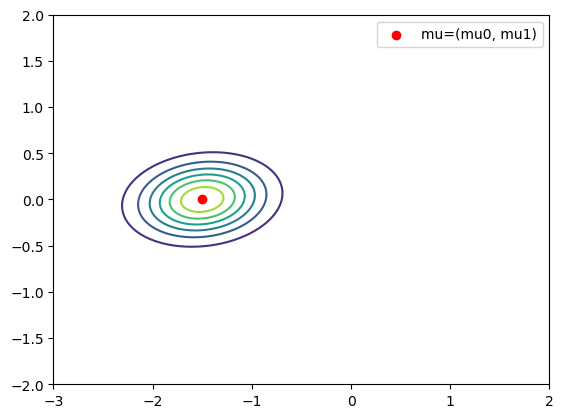

In [58]:
x0 = np.linspace(-3, 2, 1000)
x1= np.linspace(-2, 2, 1000)
X0, X1 = np.meshgrid(x0, x1)

# Mean vector and covariance matrix
mu=np.array([-1.5, 0,5])  
sigma=np.array([[7.5, 2], [0.5, 3]])                        
x0, x1=x[0], x[1]
mu0, mu1= mu[0], mu[1]  
sigma00, sigma01, sigma10, sigma11=sigma[0,0], sigma[0,1], sigma[1,0], sigma[1,1]    

# Create a bivariate normal distribution
Z = bivariate_normal(X0, X1, mu0=mu0, mu1=mu1, sigma00=sigma00, sigma01=sigma01, sigma10=sigma10, sigma11=sigma11)

# Plot the distribution
plt.contour(X0, X1, Z)
plt.scatter(mu0, mu1, label='mu=(mu0, mu1)', color='red')
plt.legend()
plt.show()

## Plottig bivariate normal distribution  in 3D:

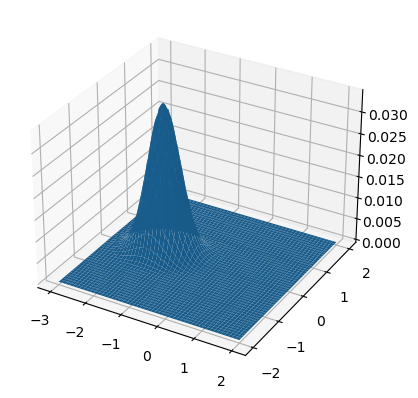

In [63]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
fig = plt.figure()
plt.subplot(projection='3d')
ax = fig.gca()
surf = ax.plot_surface(X0, X1, Z)
plt.show()